# 가설검증 젠트리피케이션 가설 점포, 매출

---
결과 요약
1. 전체 점포 수
- <U>**2023 3분기 최신 데이터**</U> 확인결과, 점포수의 숫자나 변화를 이용할꺼면 미쳐 분리 못한 <U>**normal 지역의 상권이 많은 곳**</U>은 적절하게 처리해주는 과정이 필요할것으로 판단됨
- 젠트리 지역과 비젠트리 지역간의 시계열 변화율(2019 1분기, 2023년 3분기)을 확인한 결과, <U>**젠트리 지역은 <span style = "color:red">증가의 추세</span>, 비젠트리 지역은 <span style = "color:blue">감소의 추세</span>를 보이고 있음**</U>
- 해당 데이터는 어느 정도 유의미하다고 판단되서 회귀분석 진행했고 <U>**점포 800개 이상**인 상권의 통계적으로 유의미한 데이터(p < 0.05)를 확인한 결과</U>,<br/>위와 똑같이 <U>**젠트리 지역은 증가의 추세, 비젠트리 지역은 감소의 추세를 보이고 있음**</U>
- 추후 해당 지역의 상권변화에 p-value나 기울기는 feature로 사용이 가능하다고 판단됨

2. 프랜차이즈 점포
- 전체적으로 젠트리와 비젠트리 둘 다 <U>**프랜차이즈의 점포수는 계속 감소**</U>하는 추세
- <U>**점포간의 관계성을 찾기가 힘듬.**</U>
- 관계성을 찾기 위해서는 임대료에 관한 데이터가 필요할 것으로 예상됨.
- 근데 임대료 데이터 봐도... 그때 예전에 수미님이 하신거 보면 임대료는 상승중인데 점포는 떨어지는 중이니까. 살짝... 음의관계가 나와서 변수로는 사용이 불가능 할수 있음
- 그래도 다른 데이터간의 조합했을 때 확인해 봤을 때, 상관관계가 높게 나오면 적용은 가능할 것으로 보임
---

## STEP 1. 데이터 확인

In [1]:
# 사용 라이브러리
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import geopandas as gpd
import os
import datetime as dt

# 한글 폰트 사용
font_path = "C:\Windows\Fonts\malgun.ttf"  # 경로 확인 후 변경 필요
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

In [2]:
# 전체 상권, 상권배우지 데이터 확인
folder_path = 'C:/Users/mir96/OneDrive/MLOps 중간 프로젝트/데이터 수집/1. 원본 데이터/2. 머신러닝 Feature 자료/3. 경제적 특성/서울시 상권분석서비스'

commercial =f'{folder_path}/서울시 상권분석서비스(영역-상권)/서울시 상권분석서비스(영역-상권).shp'
commercial_around = f'{folder_path}/서울시 상권분석서비스(영역-상권배후지)/서울시 상권분석서비스(영역-상권배후지).shp'

com_info = gpd.read_file(commercial)
com_around_info = gpd.read_file(commercial_around)

com_list = com_info.drop(columns='geometry')
com_around_list = com_around_info.drop(columns='geometry')

In [3]:
# 젠트로, 비젠트로 확인
site_com_path = '상권_500m_읍면동.csv'
site_com_around_path = '상권배후지_500m_읍면동.csv'

# 상권 데이터 불러오기기
site_com = pd.read_csv(site_com_path, encoding = 'euc-kr')

# 상권배후지 불러오기
site_com_around= pd.read_csv(site_com_around_path, encoding = 'euc-kr')

In [4]:
site_com

,주소명,category,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,EMD_CD,EMD_KOR_NM
0,강남역,비젠트리피케이션,D,발달상권,3120189,강남역,11650,서초구,11650520,서초2동,11650108,서초동
1,강남역,비젠트리피케이션,D,발달상권,3120189,강남역,11650,서초구,11650520,서초2동,11680101,역삼동
2,강남역,비젠트리피케이션,D,발달상권,3120197,역삼역,11680,강남구,11680640,역삼1동,11680101,역삼동
3,강남역,비젠트리피케이션,D,발달상권,3120187,신논현역,11680,강남구,11680521,논현1동,11650108,서초동
4,강남역,비젠트리피케이션,A,골목상권,3110954,국기원,11680,강남구,11680640,역삼1동,11680101,역삼동
...,...,...,...,...,...,...,...,...,...,...,...,...
564,용리단길,젠트리피케이션,D,발달상권,3120044,삼각지역,11170,용산구,11170625,한강로동,11170125,한강로2가
565,용리단길,젠트리피케이션,D,발달상권,3120044,삼각지역,11170,용산구,11170625,한강로동,11170126,용산동3가
566,용리단길,젠트리피케이션,A,골목상권,3110073,삼각지역 3번,11170,용산구,11170625,한강로동,11170124,한강로1가
567,용리단길,젠트리피케이션,A,골목상권,3110073,삼각지역 3번,11170,용산구,11170625,한강로동,11170125,한강로2가


In [5]:
site_name = site_com.drop_duplicates(subset= '주소명')[['주소명', 'category']]
site_name

,주소명,category
0,강남역,비젠트리피케이션
5,압구정로데오,비젠트리피케이션
17,건대입구역,비젠트리피케이션
28,여의도역,비젠트리피케이션
29,동대문(DDP),비젠트리피케이션
98,잠실역,비젠트리피케이션
102,회기역,비젠트리피케이션
122,영등포,비젠트리피케이션
164,청담,비젠트리피케이션
174,사당,비젠트리피케이션


In [6]:
gen_lst= site_name[site_name['category'] == '젠트리피케이션']['주소명'].tolist()
gen_code_lst = site_name[site_name['category'] == '젠트리피케이션']['주소명'].tolist()
non_gen_lst= site_name[site_name['category'] == '비젠트리피케이션']['주소명'].tolist()

In [7]:
site_name

,주소명,category
0,강남역,비젠트리피케이션
5,압구정로데오,비젠트리피케이션
17,건대입구역,비젠트리피케이션
28,여의도역,비젠트리피케이션
29,동대문(DDP),비젠트리피케이션
98,잠실역,비젠트리피케이션
102,회기역,비젠트리피케이션
122,영등포,비젠트리피케이션
164,청담,비젠트리피케이션
174,사당,비젠트리피케이션


In [8]:
com_df = site_com.drop_duplicates(subset= 'TRDAR_CD_N')[['TRDAR_CD_N','주소명', 'category']]
com_df

,TRDAR_CD_N,주소명,category
0,강남역,강남역,비젠트리피케이션
2,역삼역,강남역,비젠트리피케이션
3,신논현역,강남역,비젠트리피케이션
4,국기원,강남역,비젠트리피케이션
5,성수대교남단,압구정로데오,비젠트리피케이션
...,...,...,...
556,방배노인종합복지관(이수중학교),이수역,젠트리피케이션
557,이수역 5번,이수역,젠트리피케이션
558,신용산역(용산역),용리단길,젠트리피케이션
563,삼각지역,용리단길,젠트리피케이션


In [9]:
com_category_lst = pd.merge(com_list, com_df, left_on = 'TRDAR_CD_N', right_on='TRDAR_CD_N', how = 'outer').rename({'주소명' : '중첩지역'}, axis=1)
com_category_lst['category'] = com_category_lst['category'].fillna('normal')
com_category_lst

,TRDAR_SE_C,TRDAR_SE_1,TRDAR_CD,TRDAR_CD_N,XCNTS_VALU,YDNTS_VALU,SIGNGU_CD,SIGNGU_CD_,ADSTRD_CD,ADSTRD_CD_,RELM_AR,중첩지역,category
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093.0,453418.0,11110,종로구,11110515,청운효자동,149264.0,서촌,젠트리피케이션
1,U,관광특구,3001494,종로·청계 관광특구,199796.0,452274.0,11110,종로구,11110615,종로1·2·3·4가동,653127.0,동대문(DDP),비젠트리피케이션
2,R,전통시장,3130021,신설종합시장,201854.0,452569.0,11110,종로구,11110710,숭인2동,9800.0,NaN,normal
3,R,전통시장,3130002,세종마을음식문화거리(금천교시장),197423.0,453030.0,11110,종로구,11110530,사직동,49557.0,서촌,젠트리피케이션
4,R,전통시장,3130001,통인시장,197351.0,453449.0,11110,종로구,11110515,청운효자동,38280.0,서촌,젠트리피케이션
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,R,전통시장,3130322,고분다리전통시장,211771.0,449208.0,11740,강동구,11740620,천호3동,20499.0,NaN,normal
1646,R,전통시장,3130323,둔촌역전통시장,211868.0,447599.0,11740,강동구,11740660,성내3동,36613.0,NaN,normal
1647,R,전통시장,3130324,길동복조리시장,212690.0,448844.0,11740,강동구,11740685,길동,29464.0,NaN,normal
1648,R,전통시장,3130325,명일전통시장,212839.0,449976.0,11740,강동구,11740530,명일1동,27547.0,NaN,normal


이제 데이터는 대충 준비된거 같으니 시작해보자

## STEP 2. EDA

### 1. 점포 관련
#### 점포 관련 데이터 확인

In [10]:
site_name = site_com.drop_duplicates(subset= ['주소명', 'TRDAR_CD'])[['주소명', 'TRDAR_CD', 'TRDAR_CD_N','category']]
site_name

,주소명,TRDAR_CD,TRDAR_CD_N,category
0,강남역,3120189,강남역,비젠트리피케이션
2,강남역,3120197,역삼역,비젠트리피케이션
3,강남역,3120187,신논현역,비젠트리피케이션
4,강남역,3110954,국기원,비젠트리피케이션
5,압구정로데오,3120195,성수대교남단,비젠트리피케이션
...,...,...,...,...
556,이수역,3110905,방배노인종합복지관(이수중학교),젠트리피케이션
557,이수역,3110904,이수역 5번,젠트리피케이션
558,용리단길,3120041,신용산역(용산역),젠트리피케이션
563,용리단길,3120044,삼각지역,젠트리피케이션


In [11]:
# 병합구현
## 데이터보면 엄청 많아서 불러오고 전처리 하고 붙이고 과정이 필요할것으로 생각됨
total_type_close = pd.DataFrame(None)

### code별로 전처리 불러오기
# total_code = site_name["TRDAR_CD"].tolist()

for n in range(2019, 2024) : # 일단 귀찮으니까 매년 초를 기준으로 분석 뭔가 이상하다 싶으면 다르게도 합쳐서 분석가능
    store_type_close = pd.read_csv(f'{folder_path}/서울시_상권분석서비스(점포-상권)_{n}년.csv', encoding='euc-kr')
    # store_type_close = store_type_close[store_type_close['상권_코드'].isin(total_code)]
    total_type_close = pd.concat([total_type_close, store_type_close])
print(f'수집된 데이터는 {len(total_type_close)}개 입니다')
total_type_close.head()

수집된 데이터는 1512683개 입니다


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20191,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0
1,20191,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1
2,20191,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0
3,20191,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0
4,20191,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0


일단 분기별 데이터니까 시계열 데이터에 대한 처리가 필요해보임

20241 20242 이런식으로 형성되있는거 같으니까
- 1분기 -> 1월 (1월 ~ 3월)
- 2분기 -> 4월 (4월 ~ 6월)
- 3분기 -> 7월 (7월 ~ 9월)
- 4분기 -> 10월 (10월 ~ 12월)
으로 생성

구현하고 나중에도 쓸꺼같으니 분기별로 변경하는 것은 함수화 시키는게 좋겠음

In [12]:
# 20241같은걸 분기별로 변환
def time_to_quarter(date) :
    year = int(str(date)[:4])
    quarter = int(str(date)[4:])
    month = (quarter-1) * 3 + 1
    return pd.Timestamp(year=year, month=month, day = 1)

In [13]:
# 점포 데이터 분기별로 변환환
total_type_close['기준_년분기_코드'] = total_type_close['기준_년분기_코드'].apply(time_to_quarter)
total_type_close_qurt = total_type_close.copy()
total_type_close_qurt

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0
1,2019-01-01,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1
2,2019-01-01,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0
3,2019-01-01,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0
4,2019-01-01,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304696,2023-10-01,R,전통시장,3130327,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",CS300024,운동/경기용품,7,7,0,0,0,0,0
304697,2023-10-01,R,전통시장,3130327,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",CS300027,섬유제품,9,9,0,0,0,0,0
304698,2023-10-01,R,전통시장,3130327,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",CS300029,애완동물,1,1,0,0,0,0,0
304699,2023-10-01,R,전통시장,3130327,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",CS300035,인테리어,2,2,0,0,0,0,0


#### 전체 현황분석
- 2023년 가장 마지막 컬럼 기준으로 '비젠트리피케이션', '젠트리피케이션'을 구분해서 진행

In [14]:
# qurt_com_melt = qurt_com.sort_values(by = '2023-10-01', ascending=True).reset_index().melt(id_vars = '상권_코드_명', var_name='분기', value_name='점포개수')
qurt_com = pd.pivot_table(total_type_close_qurt, values = '점포_수', index = '상권_코드_명', columns = '기준_년분기_코드', aggfunc= 'sum').sort_values(by = '2023-10-01', ascending=False)
qurt_com_now = qurt_com.iloc[:,-1]
qurt_com_now = qurt_com_now.reset_index() 

# 병합
qurt_com_now_merge = pd.merge(qurt_com_now, com_category_lst, left_on = '상권_코드_명', right_on = 'TRDAR_CD_N')
column_list = qurt_com_now_merge.columns.tolist()
column_list[1] = '점포수'
qurt_com_now_merge.columns = column_list                 

##### 시각화
- normal쪽의 상권개수가 너무 많으니 normal쪽하고 비교하기엔 아직 약간 무리가 있음.
- 우선 젠트리와 비젠트리끼리 상권별 점포 개수 확인

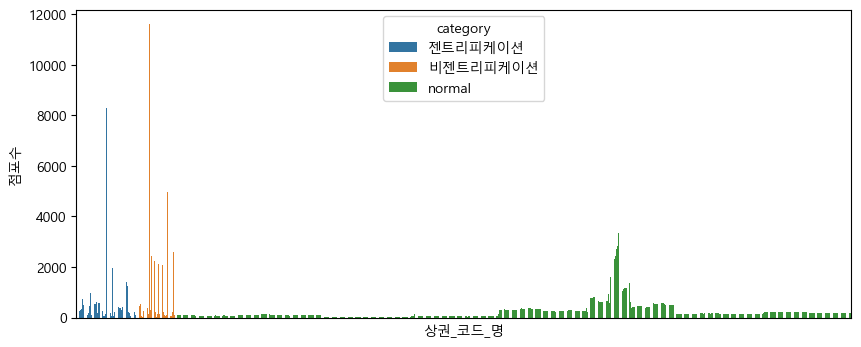

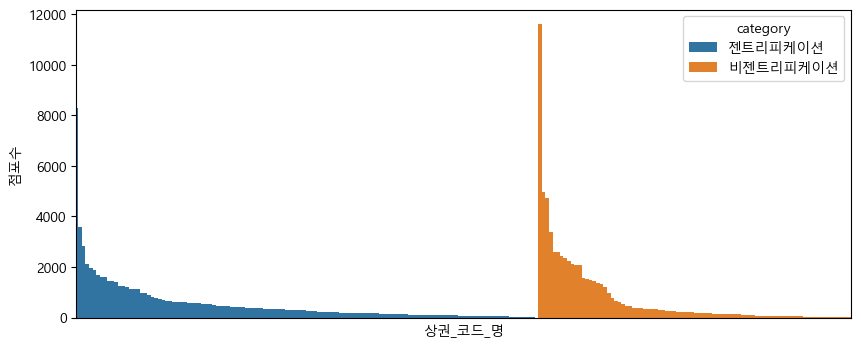

In [15]:
# 전체 점포 확인
plt.figure(figsize=(10,4))
sns.barplot(qurt_com_now_merge.sort_values(by = 'category', ascending=False), x = '상권_코드_명', y = '점포수', hue = 'category', width=2)
plt.xticks([])
plt.show()

# 젠 비젠만 전체 점포분포 확인
jen_bejen_com = qurt_com_now_merge[qurt_com_now_merge['category'].isin(['젠트리피케이션', '비젠트리피케이션'])]
plt.figure(figsize=(10,4))
sns.barplot(jen_bejen_com.sort_values(by = ['category','점포수'], ascending=False), x = '상권_코드_명', y = '점포수', hue = 'category', width=2)
plt.xticks([])
plt.show()


- 젠트리피 비젠트리피 지역이 확실히 타 상권들 보다 높은 점포수를 보유하고 있음을 알수있음
    - 일부 normal쪽에서도 점포수가 많은 지역이 확인이 되는데, 나중에 머신러닝 or 다른 것을 확인할때 조금 확인해야할 필요가 있음
- 그리고 젠트리피케이션, 비젠트리피케이션의 비교분석은 약간 비슷한 분포를 보이고 있는데 그래도 저런 점포수가 압도적으로 높은 지역이 있음 한번 확인

#### 카테고리별 전체 변화량 TOP 10, LOW 10
- 다른 자료와는 다르게 이 자료는 그래도 시계열 부분에서 잘 되있는 느낌이라 볼수있는 방향성이 많음.
- 점포가 1650개로 개수가 많기 때문에 변화율 중에서 가장 차이가 큰 상황만 시각화

##### 데이터 정리

In [16]:
qurt_com_df = total_type_close_qurt.copy()
qurt_com_df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0
1,2019-01-01,D,발달상권,3120165,서래마을카페거리(서래마을),CS100007,치킨전문점,0,1,0,0,100,1,1
2,2019-01-01,D,발달상권,3120177,신논현역 1번,CS300015,가방,3,3,0,0,0,0,0
3,2019-01-01,A,골목상권,3110508,서연중학교,CS200041,사진관,6,6,17,1,0,0,0
4,2019-01-01,A,골목상권,3110241,먹골역 5번,CS300036,조명용품,2,2,0,0,0,0,0


In [17]:
# 해당 상권이 정해놓은 상권하고 merge하는 과정이 필요
qurt_com_category_merge = pd.merge(qurt_com_df, site_name, left_on = '상권_코드_명', right_on = 'TRDAR_CD_N')
qurt_com_category_merge.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,주소명,TRDAR_CD,TRDAR_CD_N,category
0,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
1,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300021,문구,65,65,0,0,2,1,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
2,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300002,편의점,0,2,0,0,0,0,2,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
3,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300035,인테리어,2,2,0,0,0,0,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
4,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300008,수산물판매,1,1,0,0,0,0,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션


In [18]:
import datetime

# 전체별 시계열의 변화율을 체크하고 싶음
## 더 좋은 방법이 있을꺼 같긴한데 일단 젠트리피랑 비젠트리피로 테이블을 나눠서 하는게 가장 깔끔해보임
gen_qurt_com = qurt_com_category_merge[qurt_com_category_merge['category'].isin(['젠트리피케이션'])]
nongen_qurt_com = qurt_com_category_merge[qurt_com_category_merge['category'].isin(['비젠트리피케이션'])]

# 각각의 피벗테이블 생성
gen_qurt_com_pivot = gen_qurt_com.pivot_table('점포_수', '상권_코드_명', '기준_년분기_코드', aggfunc= 'sum')
nongen_qurt_com_pivot = nongen_qurt_com.pivot_table('점포_수', '상권_코드_명', '기준_년분기_코드', aggfunc= 'sum')

# datetime 형태면 귀찮으니까 타입 정렬까지 진행
gen_qurt_com_columns = gen_qurt_com_pivot.columns.strftime('%Y-%m-%d')
gen_qurt_com_pivot.columns = gen_qurt_com_columns

nongen_qurt_com_columns = nongen_qurt_com_pivot.columns.strftime('%Y-%m-%d')
nongen_qurt_com_pivot.columns = nongen_qurt_com_columns


# 각 첫행에 있는 숫자로 나누기
## 젠트리 TOP 10
gen_top10_areas = gen_qurt_com_pivot.sort_values(by = '2019-01-01', ascending= False).head(10)
gen_qurt_com_pivot_rate = gen_top10_areas.div(gen_top10_areas.iloc[:, 0], axis=0) * 100
gen_qurt_com_pivot_rate_melt = gen_qurt_com_pivot_rate.dropna(axis=1).reset_index().melt(id_vars='상권_코드_명', var_name = '기준_년분기_코드', value_name='점포개수')

## 젠트리 LOW 10
gen_low10_areas = gen_qurt_com_pivot.sort_values(by = '2019-01-01', ascending= True).head(10)
gen_low10_pivot_rate = gen_low10_areas.div(gen_low10_areas.iloc[:, 0], axis=0) * 100
gen_low10_pivot_rate_melt = gen_low10_pivot_rate.dropna(axis=1).reset_index().melt(id_vars='상권_코드_명', var_name = '기준_년분기_코드', value_name='점포개수')

## 비젠트리 TOP 10
nongen_top10_areas = nongen_qurt_com_pivot.sort_values(by = '2019-01-01', ascending= False).head(10)
nongen_qurt_com_pivot_rate = nongen_top10_areas.div(nongen_top10_areas.iloc[:, 0], axis=0) * 100
nongen_qurt_com_pivot_rate_melt = nongen_qurt_com_pivot_rate.reset_index().dropna().melt(id_vars='상권_코드_명', var_name = '기준_년분기_코드', value_name='점포개수')

## 비젠트리 LOW 10
nongen_low10_areas = nongen_qurt_com_pivot.sort_values(by = '2019-01-01', ascending= True).head(10)
nongen_low10_pivot_rate = nongen_low10_areas.div(nongen_low10_areas.iloc[:, 0], axis=0) * 100
nongen_low10_pivot_rate_melt = nongen_low10_pivot_rate.reset_index().dropna().melt(id_vars='상권_코드_명', var_name = '기준_년분기_코드', value_name='점포개수')


In [19]:
gen_low10_areas.head()

기준_년분기_코드,2019-01-01,2019-04-01,2019-07-01,2019-10-01,2020-01-01,2020-04-01,2020-07-01,2020-10-01,2021-01-01,2021-04-01,2021-07-01,2021-10-01,2022-01-01,2022-04-01,2022-07-01,2022-10-01,2023-01-01,2023-04-01,2023-07-01,2023-10-01
상권_코드_명,,,,,,,,,,,,,,,,,,,,
합정시장,8,8,8,7,6,5,5,5,5,5,6,7,7,7,7,7,7,7,7,6
영진시장,10,10,11,10,11,12,12,13,14,13,13,13,12,12,12,13,12,12,11,10
체부동홍종문가옥,14,15,17,18,18,19,19,20,20,22,22,23,23,24,24,24,26,27,27,27
회현역 1번,22,22,22,21,20,20,21,22,25,24,23,24,24,22,22,21,21,21,21,21
청와대사랑채,22,22,22,24,23,23,24,24,24,26,26,27,27,27,29,29,28,28,29,28


LOW로 봤을때는 점포의 변화가 달라서 변화율이 그렇게 좋은 방법으로 작용하지 않을꺼 같아서 제외

TOP 10으로만 시각화로 해서 한번 확인해보면 좋을듯

##### 시각화

- 각 젠트리 비젠트리의 TOP 10 점포수 끼리의 변화

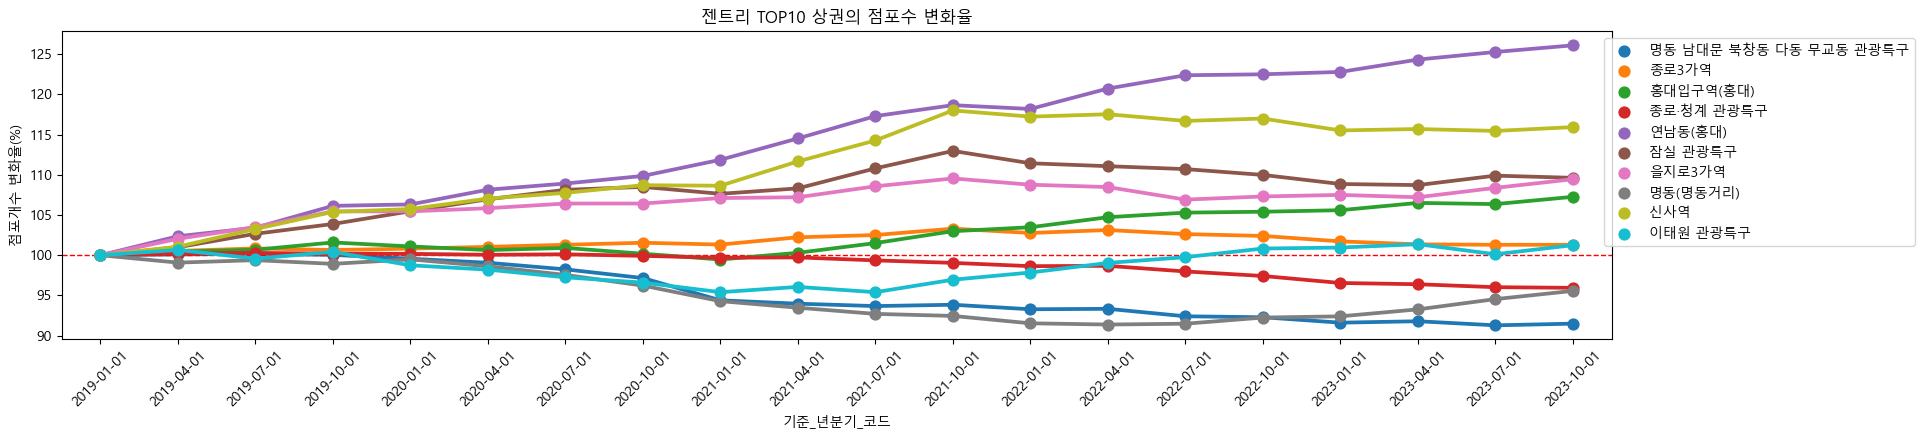

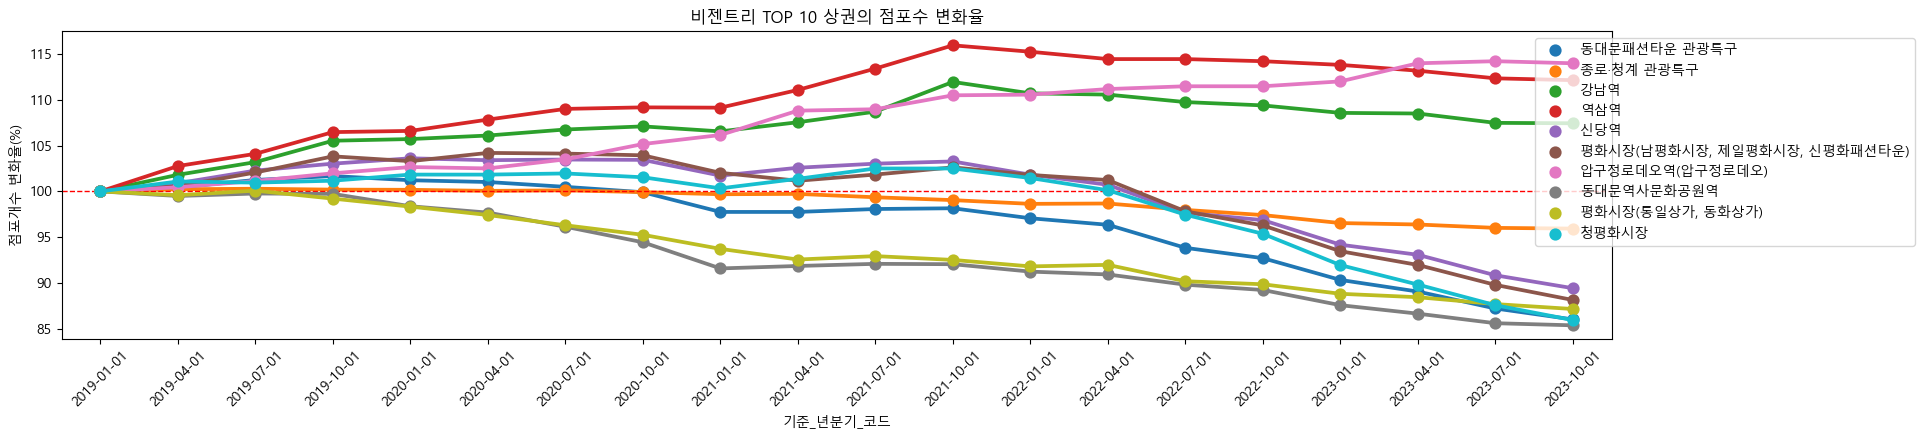

In [20]:

# 젠트리
## 각 점포수 TOP 10 변화율 시각화
plt.figure(figsize = (20, 4))
plt.title('젠트리 TOP10 상권의 점포수 변화율')
ax = sns.pointplot(gen_qurt_com_pivot_rate_melt.reset_index(), x = '기준_년분기_코드', y = '점포개수', hue = '상권_코드_명')
ax.axhline(y = 100, color='red', linestyle='--', linewidth = 1)
plt.ylabel('점포개수 변화율(%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.xticks(rotation = 45)

# 비젠트리
## 각 점포수 TOP 10 변화율 시각화
plt.figure(figsize = (20, 4))
plt.title('비젠트리 TOP 10 상권의 점포수 변화율')
ax = sns.pointplot(nongen_qurt_com_pivot_rate_melt.reset_index(), x = '기준_년분기_코드', y = '점포개수', hue = '상권_코드_명')
ax.axhline(y = 100, color='red', linestyle='--', linewidth = 1)
plt.ylabel('점포개수 변화율(%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.xticks(rotation = 45)

plt.show()

##### 시각화 해석
- 젠트리 지역은 상권수가 올라가고 있는 형태
- 비젠트리 지역은 상권수가 감소하고 있는 경향이 보인다
- 의견 :
    - 외의로 의미있는 해석이 나오는거 같아서 괜찮아보이네요
    - 점포수가 많은 지역만으로 뽑아서 체크해보긴 했지만 전체적으로 확인해보는 과정이 필요할꺼 같아서 바로 각 지역별로 ***선형 회귀***로 어떻게 분포되있는지 진행

#### 카테고리별 선형회귀 분석

##### 데이터 전처리

In [21]:
import numpy as np
from scipy import stats

# 각 상권별로 시계열 트렌드 기울기와 R² 값 계산
def calculate_slope_and_r2(row):
    x = np.arange(len(row))
    # NaN 값 제외
    mask = ~np.isnan(row)
    if np.sum(mask) > 1:  # 최소 2개 이상의 유효값이 있어야 함
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], row[mask])
        r_squared = r_value**2
        return pd.Series({'slope': slope, 'r_squared': r_squared, 'p_value': p_value})
    return pd.Series({'slope': np.nan, 'r_squared': np.nan, 'p_value': np.nan})

# 젠트리피케이션 지역 분석
com_count = 800

gen_com_800over = gen_qurt_com_pivot[gen_qurt_com_pivot > com_count].dropna()
total_gen_com_rate = gen_com_800over.div(gen_com_800over.iloc[:, 0], axis=0) * 100
gen_stats = total_gen_com_rate.apply(calculate_slope_and_r2, axis=1)
gen_stats_df = gen_stats.sort_values(by='slope', ascending=True)

# 트렌드 레이블 추가
gen_stats_df['trend_label'] = ['증가' if slope > 0 else '감소' for slope in gen_stats_df['slope']]
gen_stats_df['significant'] = gen_stats_df['p_value'] < 0.05

# 비젠트리피케이션 지역 분석
nongen_com_800over = nongen_qurt_com_pivot[nongen_qurt_com_pivot > com_count].dropna()
total_nongen_com_rate = nongen_com_800over.div(nongen_com_800over.iloc[:, 0], axis=0) * 100
nongen_stats = total_nongen_com_rate.apply(calculate_slope_and_r2, axis=1)
nongen_stats_df = nongen_stats.sort_values(by='slope', ascending=True)

# 트렌드 레이블 추가
p_value = 0.05
nongen_stats_df['trend_label'] = ['증가' if slope > 0 else '감소' for slope in nongen_stats_df['slope']]
nongen_stats_df['significant'] = nongen_stats_df['p_value'] < p_value

# p-value가 0.05 미만인 데이터만 필터링
gen_stats_significant = gen_stats_df[gen_stats_df['p_value'] < p_value]
nongen_stats_significant = nongen_stats_df[nongen_stats_df['p_value'] < p_value]

##### 시각화

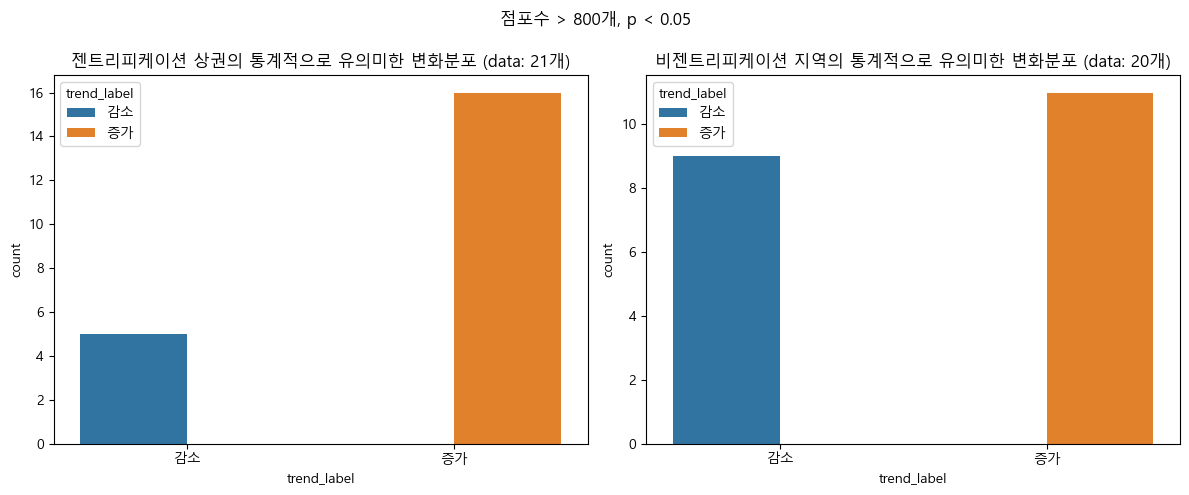

In [22]:
# 시각화
fig = plt.figure(figsize=(12, 5))
fig.suptitle(f'점포수 > {com_count}개, p < {p_value}' )

# 젠트리피케이션 지역 트렌드 분포 (p < 0.05)
plt.subplot(121)
plt.title(f'젠트리피케이션 상권의 통계적으로 유의미한 변화분포 (data: {len(gen_stats_significant)}개)')
sns.countplot(gen_stats_significant, x='trend_label', hue='trend_label')

# 비젠트리피케이션 지역 트렌드 분포 (p < 0.05)
plt.subplot(122)
plt.title(f'비젠트리피케이션 지역의 통계적으로 유의미한 변화분포 (data: {len(nongen_stats_significant)}개)')
sns.countplot(nongen_stats_significant, x='trend_label', hue='trend_label')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

##### 결과 해석
- 선형 회귀 분석 결과(p < 0.05)
- 젠트리피케이션 상권의 점포는 **증가 추세의 비율**이 많았는데, 반면 비젠트로피케이션은 젠트리 지역보다 ***감소인 추세의 비율이 많았음***
- 이러한 시계열 데이터의 **기울기, R2, p-value**를 어느정도 군집화 할때 feature로 활용이 가능할수 있을거 같음. 

#### 전체 현황 분석결과 정리
---

- <U>**2023 3분기 최신 데이터**</U> 확인결과, 점포수의 숫자나 변화를 이용할꺼면 미쳐 분리 못한 <U>**normal 지역의 상권이 많은 곳**</U>은 적절하게 처리해주는 과정이 필요할것으로 판단됨
- 젠트리 지역과 비젠트리 지역간의 시계열 변화율(2019 1분기, 2023년 3분기)을 확인한 결과, <U>**젠트리 지역은 증가의 추세, 비젠트리 지역은 감소의 추세를 보이고 있음**</U>
- 따라서 해당 데이터를 회귀분석 진행했고 <U>**점포 800개 이상**인 상권의 통계적으로 유의미한 데이터(p < 0.05)를 확인한 결과</U>,<br/>위와 똑같이 <U>**젠트리 지역은 증가의 추세, 비젠트리 지역은 감소의 추세를 보이고 있음**</U>
- 추후 해당 지역의 상권변화에 p-value나 기울기는 feature로 사용이 가능하다고 판단됨
---

### 프렌차이즈 점포 분석
- 전체 현황분석하고 같은 느낌으로 분석

#### 데이터 전처리


In [23]:
# 전처리 데이터 확인
qurt_com_category_merge.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,주소명,TRDAR_CD,TRDAR_CD_N,category
0,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300043,전자상거래업,10,10,10,1,0,0,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
1,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300021,문구,65,65,0,0,2,1,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
2,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300002,편의점,0,2,0,0,0,0,2,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
3,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300035,인테리어,2,2,0,0,0,0,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션
4,2019-01-01,R,전통시장,3130018,동대문문구완구거리(동대문문구완구시장),CS300008,수산물판매,1,1,0,0,0,0,0,동대문(DDP),3130018,동대문문구완구거리(동대문문구완구시장),비젠트리피케이션


In [24]:
# 전체별 시계열의 변화율을 체크하고 싶음
## 더 좋은 방법이 있을꺼 같긴한데 일단 젠트리피랑 비젠트리피로 테이블을 나눠서 하는게 가장 깔끔해보임
gen_qurt_fren = qurt_com_category_merge[qurt_com_category_merge['category'].isin(['젠트리피케이션'])]
nongen_qurt_fren = qurt_com_category_merge[qurt_com_category_merge['category'].isin(['비젠트리피케이션'])]

# 각각의 피벗테이블 생성
gen_qurt_fren_pivot = gen_qurt_fren.pivot_table('프랜차이즈_점포_수', '상권_코드_명', '기준_년분기_코드', aggfunc= 'sum')
nongen_qurt_fren_pivot = nongen_qurt_fren.pivot_table('프랜차이즈_점포_수', '상권_코드_명', '기준_년분기_코드', aggfunc= 'sum')

# datetime 형태면 귀찮으니까 타입 정렬까지 진행
gen_qurt_fren_columns = gen_qurt_fren_pivot.columns.strftime('%Y-%m-%d')
gen_qurt_fren_pivot.columns = gen_qurt_fren_columns

nongen_qurt_fren_columns = nongen_qurt_fren_pivot.columns.strftime('%Y-%m-%d')
nongen_qurt_fren_pivot.columns = nongen_qurt_fren_columns

# 각 첫행에 있는 숫자로 나누기
## 젠트리 TOP 10
gen_top10_areas = gen_qurt_fren_pivot.sort_values(by = '2019-01-01', ascending= False).head(10)
gen_qurt_fren_pivot_rate = gen_top10_areas.div(gen_top10_areas.iloc[:, 0], axis=0) * 100
gen_qurt_fren_pivot_rate_melt = gen_qurt_fren_pivot_rate.dropna(axis=1).reset_index().melt(id_vars='상권_코드_명', var_name = '기준_년분기_코드', value_name='프챈차이즈개수')

## 비젠트리 TOP 10
nongen_top10_areas = nongen_qurt_fren_pivot.sort_values(by = '2019-01-01', ascending= False).head(10)
nongen_qurt_fren_pivot_rate = nongen_top10_areas.div(nongen_top10_areas.iloc[:, 0], axis=0) * 100
nongen_qurt_fren_pivot_rate_melt = nongen_qurt_fren_pivot_rate.reset_index().dropna().melt(id_vars='상권_코드_명', var_name = '기준_년분기_코드', value_name='프챈차이즈개수')


## 수정이 필요
### 전체 프랜차이즈 말고 최신의 프랜차이즈만 확인이 필요.
print(f'젠트리 프랜차이즈 점포 개수 : {len(gen_qurt_fren[gen_qurt_fren["기준_년분기_코드"].isin(["2023-10-01"])])}')
print(f'젠트리 프랜차이즈 점포 개수 : {len(nongen_qurt_fren[nongen_qurt_fren["기준_년분기_코드"].isin(["2023-10-01"])])}')


젠트리 프랜차이즈 점포 개수 : 7988
젠트리 프랜차이즈 점포 개수 : 4201


#### 시각화

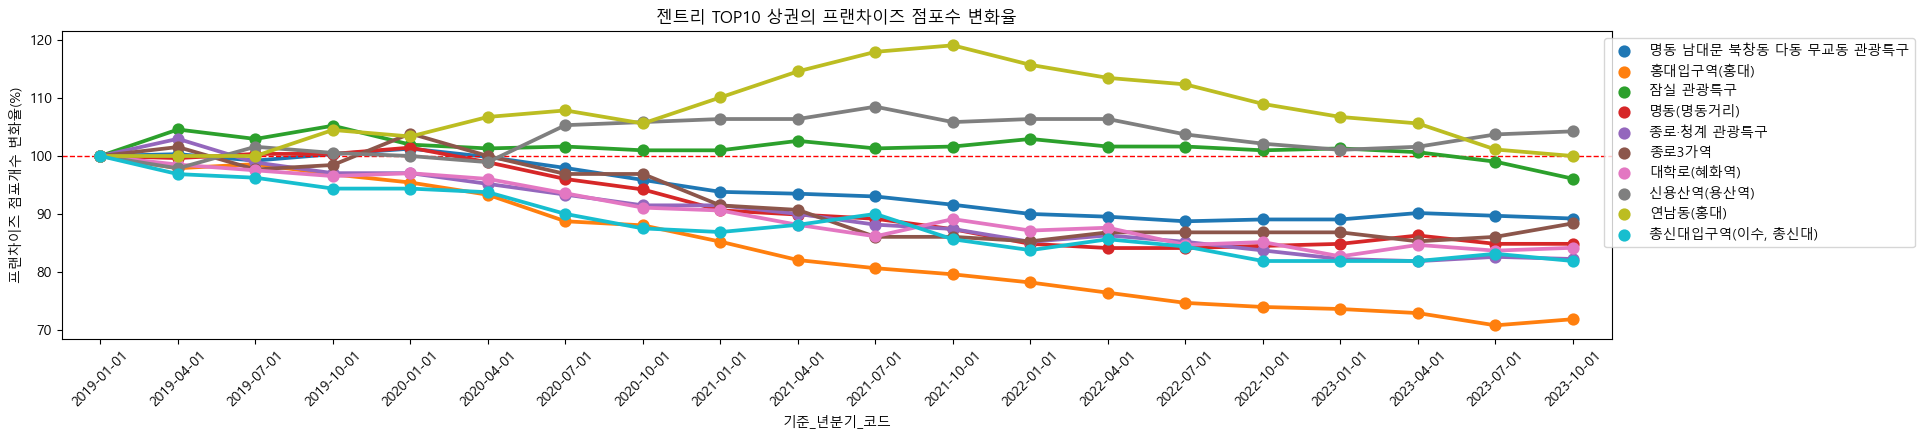

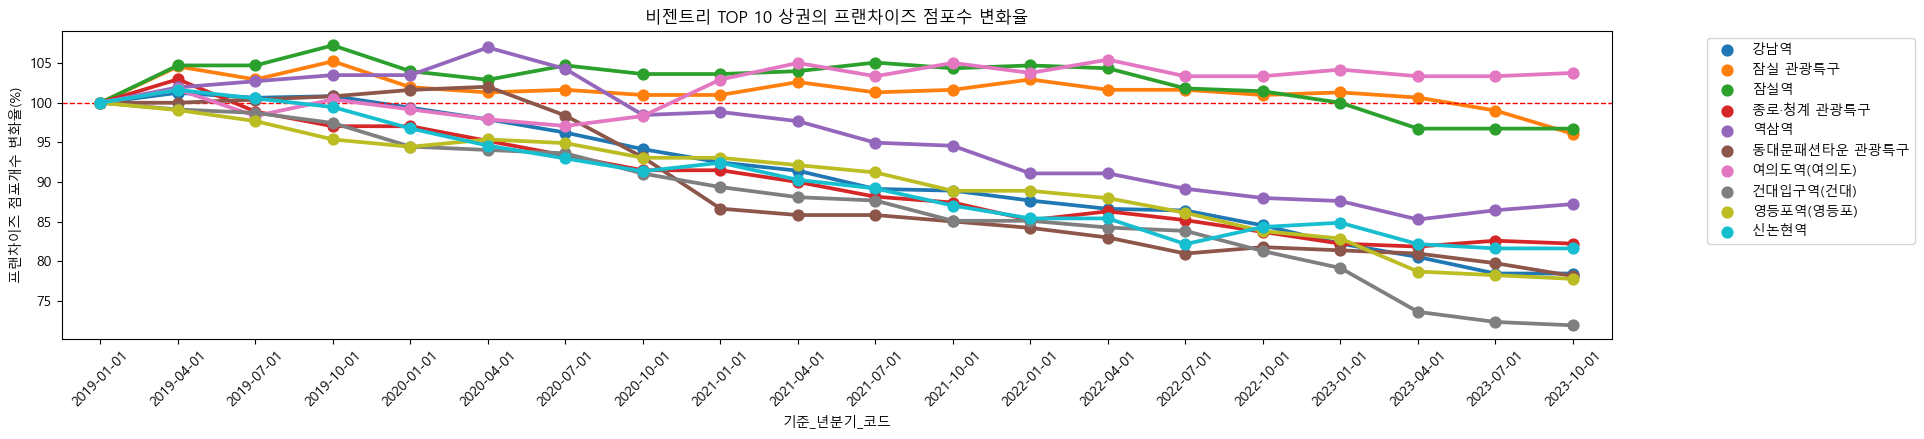

In [25]:
# 젠트리
## 각 점포수 TOP 10 변화율 시각화
plt.figure(figsize = (20, 4))
plt.title('젠트리 TOP10 상권의 프랜차이즈 점포수 변화율')
ax = sns.pointplot(gen_qurt_fren_pivot_rate_melt.reset_index(), x = '기준_년분기_코드', y = '프챈차이즈개수', hue = '상권_코드_명')
ax.axhline(y = 100, color='red', linestyle='--', linewidth = 1)
plt.ylabel('프랜차이즈 점포개수 변화율(%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.xticks(rotation = 45)

# 비젠트리
## 각 점포수 TOP 10 변화율 시각화
plt.figure(figsize = (20, 4))
plt.title('비젠트리 TOP 10 상권의 프랜차이즈 점포수 변화율')
ax = sns.pointplot(nongen_qurt_fren_pivot_rate_melt.reset_index(), x = '기준_년분기_코드', y = '프챈차이즈개수', hue = '상권_코드_명')
ax.axhline(y = 100, color='red', linestyle='--', linewidth = 1)
plt.ylabel('프랜차이즈 점포개수 변화율(%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.xticks(rotation = 45)

plt.show()

- 프랜차이즈는 보면 전체적으로 보면 하향하는 추세
- 이거는 점포별 카테고리 별로 한번 더 확인하는 방식으로 보는게 맞는듯 싶다.

In [26]:
# 각각의 피벗테이블 생성
gen_qurt_fren_pivot = gen_qurt_fren.pivot_table('프랜차이즈_점포_수', '서비스_업종_코드_명', '기준_년분기_코드', aggfunc= 'sum')
nongen_qurt_fren_pivot = nongen_qurt_fren.pivot_table('프랜차이즈_점포_수', '서비스_업종_코드_명', '기준_년분기_코드', aggfunc= 'sum')

# datetime 형태면 귀찮으니까 타입 정렬까지 진행
gen_qurt_fren_columns = gen_qurt_fren_pivot.columns.strftime('%Y-%m-%d')
gen_qurt_fren_pivot.columns = gen_qurt_fren_columns

nongen_qurt_fren_columns = nongen_qurt_fren_pivot.columns.strftime('%Y-%m-%d')
nongen_qurt_fren_pivot.columns = nongen_qurt_fren_columns


# 각 첫행에 있는 숫자로 나누기
## 젠트리 프렌차이즈 업종별 TOP 10
gen_top10_areas = gen_qurt_fren_pivot.sort_values(by = '2019-01-01', ascending= False).head(10)
gen_qurt_fren_pivot_rate = gen_top10_areas.div(gen_top10_areas.iloc[:, 0], axis=0) * 100
gen_qurt_fren_pivot_rate_melt = gen_qurt_fren_pivot_rate.dropna(axis=1).reset_index().melt(id_vars='서비스_업종_코드_명', var_name = '기준_년분기_코드', value_name='프챈차이즈개수')

## 비젠트리 프렌차이즈 업종별 TOP 10
nongen_top10_areas = nongen_qurt_fren_pivot.sort_values(by = '2019-01-01', ascending= False).head(10)
nongen_qurt_fren_pivot_rate = nongen_top10_areas.div(nongen_top10_areas.iloc[:, 0], axis=0) * 100
nongen_qurt_fren_pivot_rate_melt = nongen_qurt_fren_pivot_rate.reset_index().dropna().melt(id_vars='서비스_업종_코드_명', var_name = '기준_년분기_코드', value_name='프챈차이즈개수')

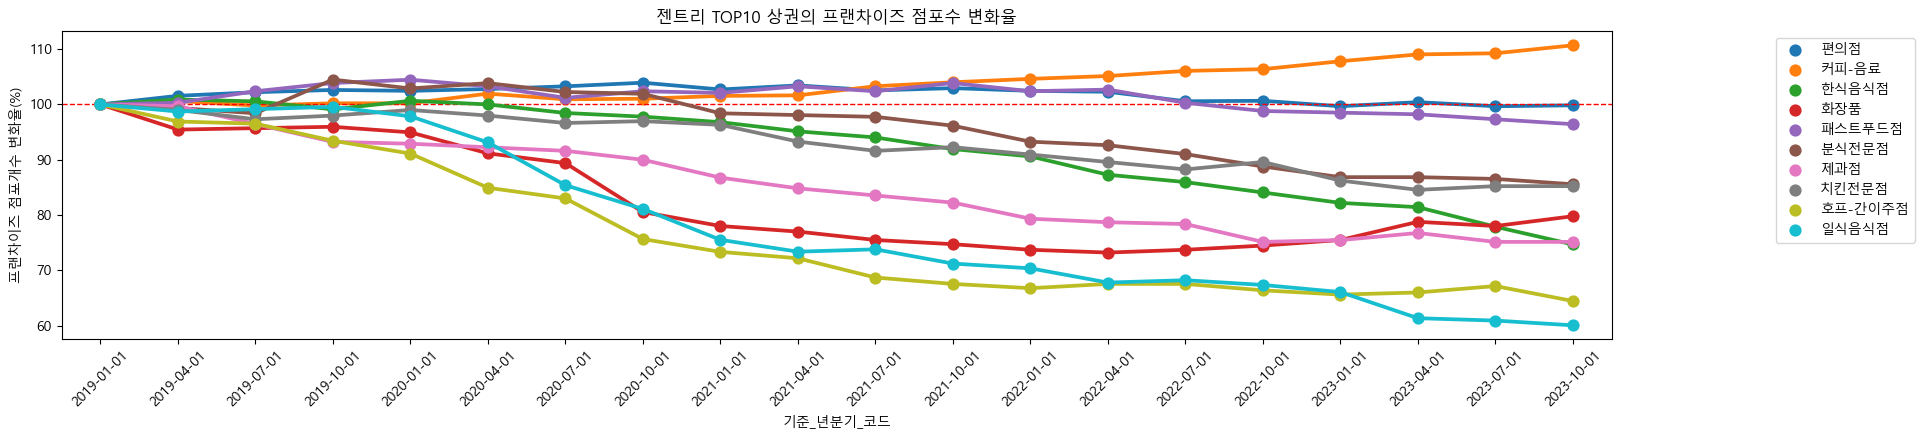

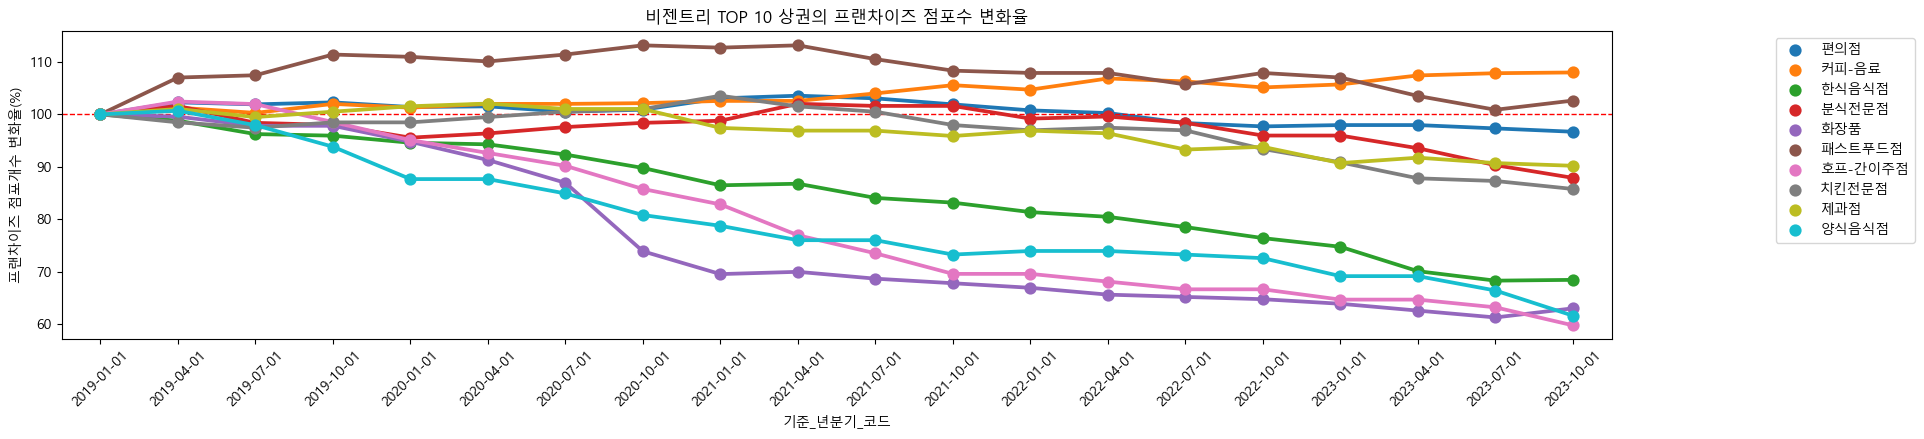

In [124]:
# 젠트리
## 각 업종별 점포수 TOP 10 변화율 시각화
plt.figure(figsize = (20, 4))
plt.title('젠트리 TOP10 상권의 프랜차이즈 점포수 변화율')
ax = sns.pointplot(gen_qurt_fren_pivot_rate_melt.reset_index(), x = '기준_년분기_코드', y = '프챈차이즈개수', hue = '서비스_업종_코드_명')
ax.axhline(y = 100, color='red', linestyle='--', linewidth = 1)
plt.ylabel('프랜차이즈 점포개수 변화율(%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.xticks(rotation = 45)

# 비젠트리
## 각 업종별 TOP 10 변화율 시각화
plt.figure(figsize = (20, 4))
plt.title('비젠트리 TOP 10 상권의 프랜차이즈 점포수 변화율')
ax = sns.pointplot(nongen_qurt_fren_pivot_rate_melt.reset_index(), x = '기준_년분기_코드', y = '프챈차이즈개수', hue = '서비스_업종_코드_명')
ax.axhline(y = 100, color='red', linestyle='--', linewidth = 1)
plt.ylabel('프랜차이즈 점포개수 변화율(%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.xticks(rotation = 45)

plt.show()

- 이거 보면 프렌차이즈 업종이 많이 감소되고 있어 프랜차이즈 별로 감소되고 있다는 가설이 좀 부정이됨.
- 그나마 인사이트를 찾는다고 하면 커피 업종이 계속 상승세로 유지되고 있다는것..

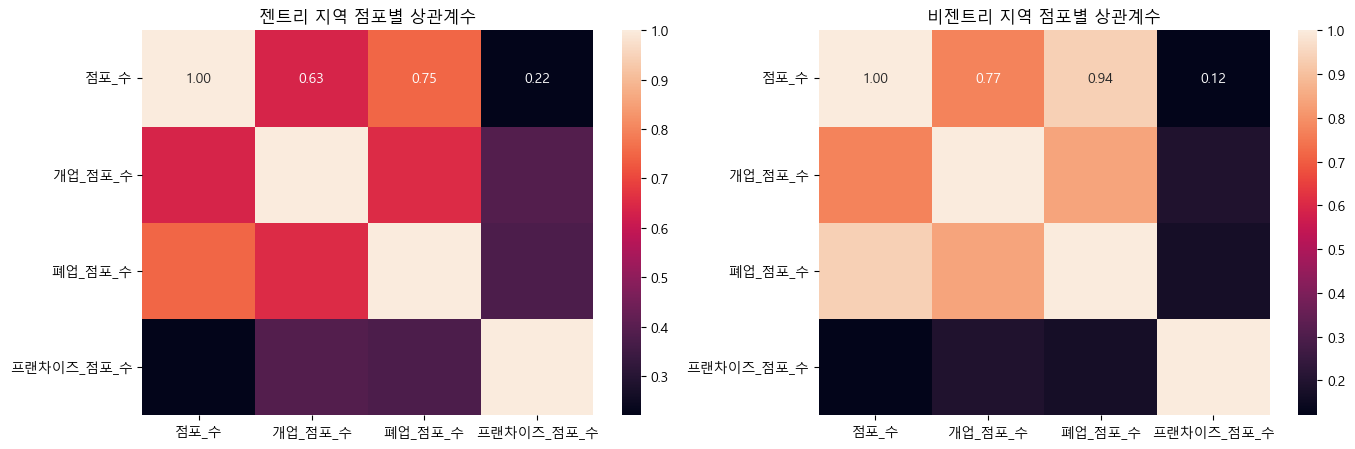

In [28]:
# 혹시 모르니까 점포수와의 상관관계를 한번보자
plt.figure(figsize = (16,5))

plt.subplot(121)
plt.title('젠트리 지역 점포별 상관계수')
sns.heatmap(gen_qurt_fren.drop(['상권_코드', 'TRDAR_CD', '유사_업종_점포_수','개업_율', '폐업_률'], axis = 1).select_dtypes(include = ['float64', 'int64']).corr(),
            annot = True,
            fmt = '.2f')

plt.subplot(122)
plt.title('비젠트리 지역 점포별 상관계수')
sns.heatmap(nongen_qurt_fren.drop(['상권_코드', '유사_업종_점포_수', 'TRDAR_CD', '개업_율', '폐업_률'], axis = 1).select_dtypes(include = ['float64', 'int64']).corr(),
            annot = True,
            fmt = '.2f')
plt.show()

In [29]:
gen_qurt_fren.drop(['상권_코드', 'TRDAR_CD', '유사_업종_점포_수','개업_율', '폐업_률'], axis = 1).select_dtypes(include = ['float64', 'int64']).corr()

,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
점포_수,1.000000,0.634545,0.749130,0.220361
개업_점포_수,0.634545,1.000000,0.650973,0.388979
폐업_점포_수,0.749130,0.650973,1.000000,0.377012
프랜차이즈_점포_수,0.220361,0.388979,0.377012,1.000000


In [30]:
nongen_qurt_fren.drop(['상권_코드', 'TRDAR_CD', '유사_업종_점포_수','개업_율', '폐업_률'], axis = 1).select_dtypes(include = ['float64', 'int64']).corr()

,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수
점포_수,1.000000,0.772764,0.936609,0.119943
개업_점포_수,0.772764,1.000000,0.841798,0.192239
폐업_점포_수,0.936609,0.841798,1.000000,0.169262
프랜차이즈_점포_수,0.119943,0.192239,0.169262,1.000000


#### 분석 결과 요약
---


- 전체적으로 젠트리와 비젠트리 둘 다 <U>**프랜차이즈의 점포수는 계속 감소**</U>하는 추세
- <U>**점포간의 강한 상관성을 찾기가 힘듬..(상관관계 0.38 정도)**</U>
- 관계성을 찾기 위해서는 임대료에 관한 데이터가 필요할 것으로 예상됨.
- 근데 임대료 데이터 봐도... 그때 예전에 수미님이 하신거 보면 임대료는 상승중인데 점포는 떨어지는 중이니까. 살짝... 음의관계가 나와서 변수로는 사용이 불가능 할수 있음
- 그래도 나중에 확인해 봤을 때, 상관관계가 높게 나오면 적용은 가능할 것으로 보임
---

### 2. 매출 관련

#### 데이터 정리

In [31]:
# 누가 영어명으로 정리해주신거 있어서 사용
## 데이터 가져오기
total_sales_df = pd.DataFrame(None)

for year in range(2019, 2024) :
    file_name = f'seoul_biz_dist_estimated_sales_{year}.csv'
    join_df = pd.read_csv(f'{folder_path}/{file_name}', encoding = 'euc-kr')
    total_sales_df = pd.concat([total_sales_df, join_df])

total_sales_df['기준_년분기_코드'] = total_sales_df['기준_년분기_코드'].apply(time_to_quarter)
total_sales_df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,2019-01-01,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290,208,17051978,...,86,27,0,208,0,56,21,0,123,8
1,2019-01-01,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711,2136,57025458,...,1270,35,59,2077,0,715,995,236,157,33
2,2019-01-01,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000,40,2337081,...,14,9,0,40,0,8,28,5,0,0
3,2019-01-01,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798,153,4984275,...,64,13,13,140,0,52,88,13,0,0
4,2019-01-01,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990,305,16694436,...,196,36,4,301,0,79,28,68,91,39


In [32]:
# 점포 데이터랑 이을수 있을거 같아서 조인좀 해보기
total_sales_com = pd.merge(total_sales_df, total_type_close, left_on = ['기준_년분기_코드', '상권_코드_명', '서비스_업종_코드'], right_on = ['기준_년분기_코드', '상권_코드_명', '서비스_업종_코드'])

## 어 되네?.., 확인결과 점포수가 더 많은 데이터로 가지고 있는거 같은데 나중에 상관관계 정도도 봐도 좋을꺼 같아서 일단 조인
total_sales_com.head()

,기준_년분기_코드,상권_구분_코드_x,상권_구분_코드_명_x,상권_코드_x,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명_x,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,상권_구분_코드_명_y,상권_코드_y,서비스_업종_코드_명_y,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2019-01-01,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290,208,17051978,...,발달상권,3120037,네일숍,5,5,20,1,0,0,0
1,2019-01-01,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,CS200029,네일숍,73147711,2136,57025458,...,관광특구,3001492,네일숍,24,25,4,1,0,0,1
2,2019-01-01,A,골목상권,3110085,경리단길남측,CS200029,네일숍,3000000,40,2337081,...,골목상권,3110085,네일숍,3,3,33,1,0,0,0
3,2019-01-01,A,골목상권,3110166,구의1동주민센터,CS200029,네일숍,8443798,153,4984275,...,골목상권,3110166,네일숍,3,3,0,0,33,1,0
4,2019-01-01,A,골목상권,3110161,중곡역 3번,CS200029,네일숍,20756990,305,16694436,...,골목상권,3110161,네일숍,3,3,0,0,0,0,0


In [100]:
site_name

,주소명,TRDAR_CD,TRDAR_CD_N,category
0,강남역,3120189,강남역,비젠트리피케이션
2,강남역,3120197,역삼역,비젠트리피케이션
3,강남역,3120187,신논현역,비젠트리피케이션
4,강남역,3110954,국기원,비젠트리피케이션
5,압구정로데오,3120195,성수대교남단,비젠트리피케이션
...,...,...,...,...
556,이수역,3110905,방배노인종합복지관(이수중학교),젠트리피케이션
557,이수역,3110904,이수역 5번,젠트리피케이션
558,용리단길,3120041,신용산역(용산역),젠트리피케이션
563,용리단길,3120044,삼각지역,젠트리피케이션


In [37]:
# 어느 지점인지 위치에 따른 조인'
total_sales_com_category = pd.merge(total_sales_com, site_name, left_on = '상권_코드_명', right_on = 'TRDAR_CD_N')
total_sales_com_category.head()

,기준_년분기_코드,상권_구분_코드_x,상권_구분_코드_명_x,상권_코드_x,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명_x,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,주소명,TRDAR_CD,TRDAR_CD_N,category
0,2019-01-01,D,발달상권,3120037,동대문역사문화공원역,CS200029,네일숍,20393290,208,17051978,...,5,20,1,0,0,0,동대문(DDP),3120037,동대문역사문화공원역,비젠트리피케이션
1,2019-01-01,D,발달상권,3120037,동대문역사문화공원역,CS100010,커피-음료,974511637,138582,713712015,...,49,4,2,6,3,18,동대문(DDP),3120037,동대문역사문화공원역,비젠트리피케이션
2,2019-01-01,D,발달상권,3120037,동대문역사문화공원역,CS300021,문구,24021173,1849,24021173,...,13,0,0,0,0,0,동대문(DDP),3120037,동대문역사문화공원역,비젠트리피케이션
3,2019-01-01,D,발달상권,3120037,동대문역사문화공원역,CS300036,조명용품,2286315581,19949,1805208274,...,7,0,0,0,0,0,동대문(DDP),3120037,동대문역사문화공원역,비젠트리피케이션
4,2019-01-01,D,발달상권,3120037,동대문역사문화공원역,CS100003,일식음식점,463101948,6539,445500393,...,13,0,0,0,0,3,동대문(DDP),3120037,동대문역사문화공원역,비젠트리피케이션


In [101]:
id_sales_columns = ['기준_년분기_코드','상권_코드_명','서비스_업종_코드', '서비스_업종_코드_명_x', 'category', '주소명']
des_sales_columns = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액'] 
week_sales_columns = ['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액','토요일_매출_금액','일요일_매출_금액', '주중_매출_금액', '주말_매출_금액']
times_sales_columns = ['시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액','시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']
com_sales_columns = ['점포_수', '프랜차이즈_점포_수']

des_sales_df = total_sales_com_category[id_sales_columns + des_sales_columns + com_sales_columns]
week_sales_df = total_sales_com_category[id_sales_columns + week_sales_columns + com_sales_columns]
times_sales_df = total_sales_com_category[id_sales_columns + times_sales_columns + com_sales_columns]\

des_sales_df.head()

,기준_년분기_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명_x,category,주소명,당월_매출_금액,주중_매출_금액,주말_매출_금액,점포_수,프랜차이즈_점포_수
0,2019-01-01,동대문역사문화공원역,CS200029,네일숍,비젠트리피케이션,동대문(DDP),20393290,17051978,3341312,5,0
1,2019-01-01,동대문역사문화공원역,CS100010,커피-음료,비젠트리피케이션,동대문(DDP),974511637,713712015,260799622,31,18
2,2019-01-01,동대문역사문화공원역,CS300021,문구,비젠트리피케이션,동대문(DDP),24021173,24021173,0,13,0
3,2019-01-01,동대문역사문화공원역,CS300036,조명용품,비젠트리피케이션,동대문(DDP),2286315581,1805208274,481107307,7,0
4,2019-01-01,동대문역사문화공원역,CS100003,일식음식점,비젠트리피케이션,동대문(DDP),463101948,445500393,17601555,10,3


구현 해야할것
- 점포수 별 당월_매출금액 = 주중_매출_금액 / 점포_수
- 일반 점포수 = 점포_수 - 프랜차이즈_점포_수 (일부 음수 나오는 것을 보아 전체 점포로 책정해야할듯)
- 전체 점포수 = 점포_수 + 프랜차이즈_점포_수수

In [102]:
des_sales_df['전체 점포수'] = des_sales_df['점포_수'] +  des_sales_df['프랜차이즈_점포_수'] 
des_sales_df['점포별_당월_매출_금액'] = des_sales_df['당월_매출_금액'] /  des_sales_df['점포_수']
des_sales_df = des_sales_df.replace([np.inf, -np.inf], np.nan)
des_sales_df.head()

C:\Users\mir96\AppData\Local\Temp\ipykernel_17788\1342515195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_sales_df['전체 점포수'] = des_sales_df['점포_수'] +  des_sales_df['프랜차이즈_점포_수']
C:\Users\mir96\AppData\Local\Temp\ipykernel_17788\1342515195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_sales_df['점포별_당월_매출_금액'] = des_sales_df['당월_매출_금액'] /  des_sales_df['점포_수']


,기준_년분기_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명_x,category,주소명,당월_매출_금액,주중_매출_금액,주말_매출_금액,점포_수,프랜차이즈_점포_수,전체 점포수,점포별_당월_매출_금액
0,2019-01-01,동대문역사문화공원역,CS200029,네일숍,비젠트리피케이션,동대문(DDP),20393290,17051978,3341312,5,0,5,4.078658e+06
1,2019-01-01,동대문역사문화공원역,CS100010,커피-음료,비젠트리피케이션,동대문(DDP),974511637,713712015,260799622,31,18,49,3.143586e+07
2,2019-01-01,동대문역사문화공원역,CS300021,문구,비젠트리피케이션,동대문(DDP),24021173,24021173,0,13,0,13,1.847783e+06
3,2019-01-01,동대문역사문화공원역,CS300036,조명용품,비젠트리피케이션,동대문(DDP),2286315581,1805208274,481107307,7,0,7,3.266165e+08
4,2019-01-01,동대문역사문화공원역,CS100003,일식음식점,비젠트리피케이션,동대문(DDP),463101948,445500393,17601555,10,3,13,4.631019e+07


##### 카테고리 주소의 점포단위별 당월 매출 금액

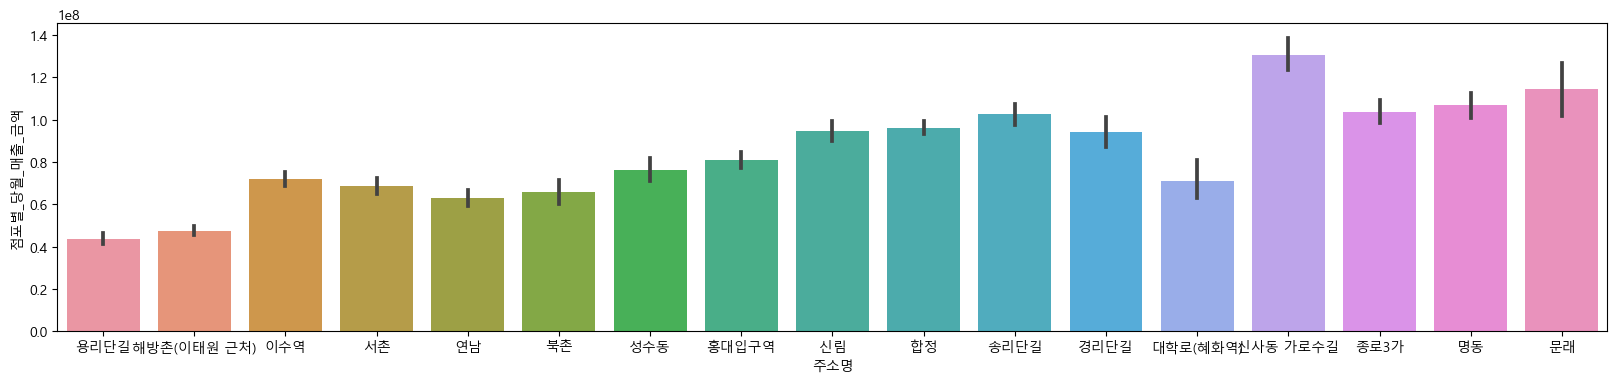

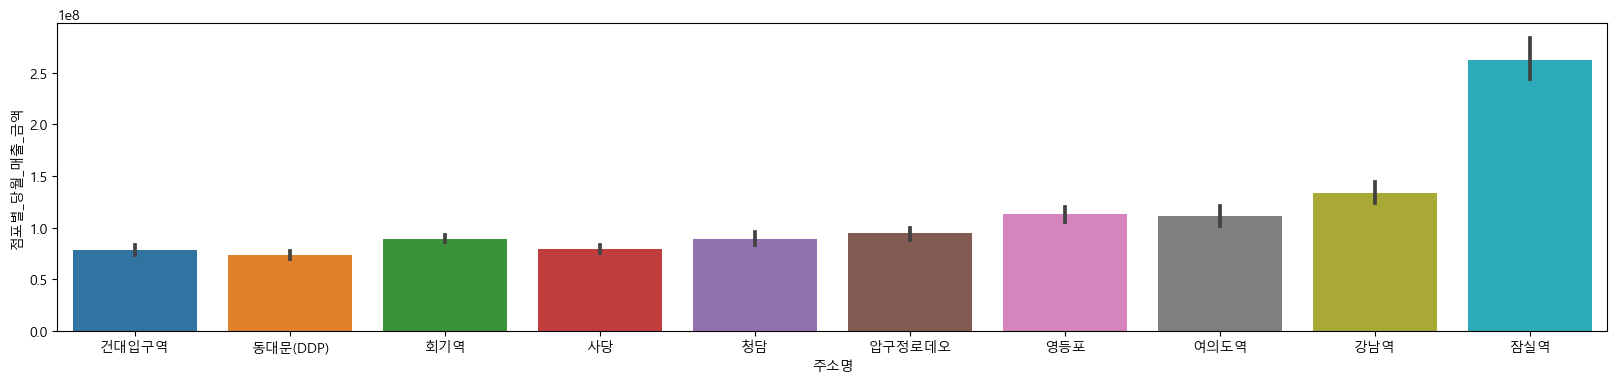

In [132]:
gen_site_sales = des_sales_df[des_sales_df['category'] == '젠트리피케이션']
nongen_site_sales = des_sales_df[des_sales_df['category'] == '비젠트리피케이션']

gen_site_sales_pivot = gen_site_sales.pivot_table(values = '점포별_당월_매출_금액', columns = '기준_년분기_코드', index= '주소명').dropna()
nongen_site_sales_pivot = nongen_site_sales.pivot_table(values = '점포별_당월_매출_금액', columns = '기준_년분기_코드', index= '주소명').dropna()

# datetime 형태면 귀찮으니까 타입 정렬까지 진행
gen_site_fren_columns = gen_site_sales_pivot.columns.strftime('%Y-%m-%d')
gen_site_sales_pivot.columns = gen_site_fren_columns

nongen_site_fren_columns = nongen_site_sales_pivot.columns.strftime('%Y-%m-%d')
nongen_site_sales_pivot.columns = nongen_site_fren_columns

# log10_gen_site_sales_pivot = np.log10(gen_site_sales_pivot) # 좀 단위가 높아서 로그스케일 진행 / 취소
gen_site_sales_melt= gen_site_sales_pivot.reset_index().sort_values(by = '2023-10-01').melt(id_vars='주소명', var_name = '기준_년분기_코드', value_name='점포별_당월_매출_금액')
plt.figure(figsize = (20, 4))
sns.barplot(data = gen_site_sales_melt, x = '주소명', y ='점포별_당월_매출_금액', estimator='mean')

nongen_site_sales_melt= nongen_site_sales_pivot.reset_index().sort_values(by = '2023-10-01').melt(id_vars='주소명', var_name = '기준_년분기_코드', value_name='점포별_당월_매출_금액')
plt.figure(figsize = (20, 4))
sns.barplot(data = nongen_site_sales_melt, x = '주소명', y ='점포별_당월_매출_금액', estimator='mean')
plt.show()

- 지역별로 점포별 당월 매출 금액의 차이를 보니까 그렇다할 결과물은 안나옴
- 다른 방식으로좀 진행해야할꺼 같음

<Axes: >

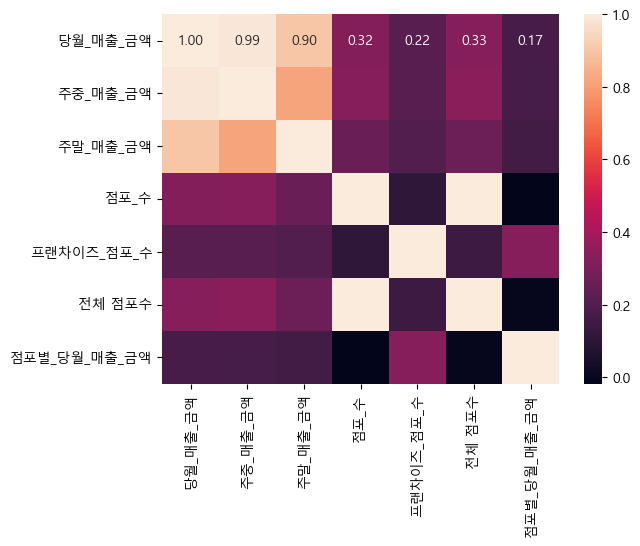

In [144]:
metrix = des_sales_df.drop(id_sales_columns, axis = 1).select_dtypes(include = ['float64', 'int64']).corr()

sns.heatmap(metrix,
            fmt = ".2f",
            annot = True)

In [147]:
metrix

,당월_매출_금액,주중_매출_금액,주말_매출_금액,점포_수,프랜차이즈_점포_수,전체 점포수,점포별_당월_매출_금액
당월_매출_금액,1.000000,0.987119,0.898438,0.321035,0.217275,0.327888,0.174528
주중_매출_금액,0.987119,1.000000,0.816616,0.328320,0.213595,0.334994,0.170260
주말_매출_금액,0.898438,0.816616,1.000000,0.257086,0.197628,0.263493,0.162337
점포_수,0.321035,0.328320,0.257086,1.000000,0.108910,0.999252,-0.017348
프랜차이즈_점포_수,0.217275,0.213595,0.197628,0.108910,1.000000,0.147273,0.326691
전체 점포수,0.327888,0.334994,0.263493,0.999252,0.147273,1.000000,-0.004649
점포별_당월_매출_금액,0.174528,0.170260,0.162337,-0.017348,0.326691,-0.004649,1.000000
